## Fall 2022 Data Science Intern Challenge 

Let's load the file!

In [1]:
import pandas as pd
sales_data=pd.read_csv("2019 Winter Data Science Intern Challenge Data Set.csv")

In [2]:
sales_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Let's look at the columns in the given data!

In [3]:
sales_data.columns

Index(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'],
      dtype='object')

Order_id is the order id related to that order, Shop_id is the shop id which is from 1 to 100. User_id is related to user's Id, Order_amount is the total price of that particular order, total_items is the number of items placed in the order. Payment_method is the method used during payment which will be either debit/credit cards or via cash. Created_at is the date and time at which the transaction happened!

In [4]:
sales_data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


So, therefore, as per the data, tha average order value is present as 3145.13 which is little odd because the if we see the quartiles, the maximum order amount is around 704000 where the one model of shoe costing more than 70k is high but let's look on a whole!

<AxesSubplot:xlabel='order_id', ylabel='order_amount'>

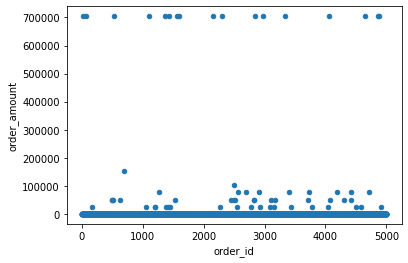

In [5]:
sales_data.plot.scatter("order_id","order_amount")


We can see that only few of the orders are present which has max value of 700000 and this seems to be a bit confusing may be because of outliers!

In [6]:
sales_data.order_amount.mean()

3145.128

In [7]:
sales_data[sales_data['order_amount']<600000].order_amount.mean()

754.0919125025085

In [8]:
sales_data[sales_data['order_amount']>600000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


But, this seems legit since the total amount 704000 is for the 2000 items which mean per item, the cost is just 352 which sounds fine

From this above observation, we got to know that the total_items is also important in deciding whether a particular outlet is fraud or not! Let's create another data column which stores cost per item.

In [9]:
sales_data['cost_per_item']=sales_data['order_amount']//sales_data['total_items']

In [10]:
sales_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,cost_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156


In [11]:
sales_data.cost_per_item.describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: cost_per_item, dtype: float64

<AxesSubplot:xlabel='order_id', ylabel='cost_per_item'>

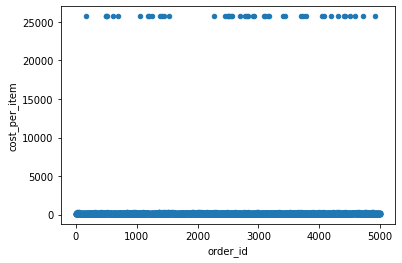

In [12]:
sales_data.plot.scatter("order_id","cost_per_item")


Here, now we can see that there's an outlet which is selling an individual item for more than 25000 which seems fishy!

In [13]:
sales_data[sales_data['cost_per_item']>25000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,cost_per_item
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725


from this above data, we can see that only this shop_id 78 is selling each item for the amount 25725 which seems like fraud!

In [14]:
sales_data[sales_data['shop_id']!=78].describe()

,order_id,shop_id,user_id,order_amount,total_items,cost_per_item
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,2498.990916,49.819540,848.919257,2717.367784,8.851029,152.475575
std,1444.498907,29.014845,87.846007,41155.996469,116.857286,31.260218
min,1.000000,1.000000,607.000000,90.000000,1.000000,90.000000
25%,1248.250000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2494.500000,50.000000,849.000000,284.000000,2.000000,153.000000
75%,3750.750000,74.000000,925.000000,390.000000,3.000000,168.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.000000,352.000000


Now, from this above data, we can see that the average order value is around 2717 which sounds fair! And from the cost_per_item column, we can see that the average cost of a shoe is around the value 152.48 and the shoes are available from 90 to 352 price range so that it's affordable by various categories of people!

In [15]:
sales_data['Day_of_month']=pd.DatetimeIndex(sales_data['created_at']).day
sales_data['Day_of_week']=pd.DatetimeIndex(sales_data['created_at']).dayofweek

In [16]:
sales_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,cost_per_item,Day_of_month,Day_of_week
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112,13,0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90,3,4
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144,14,1
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156,26,6
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156,1,2


In [17]:
sales_data=sales_data.sort_values(by=['shop_id'])


In [18]:
sales_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,cost_per_item,Day_of_month,Day_of_week
4515,4516,1,797,316,2,cash,2017-03-17 16:43:51,158,17,4
4657,4658,1,886,316,2,debit,2017-03-02 19:20:24,158,2,3
1190,1191,1,734,316,2,debit,2017-03-03 3:40:15,158,3,4
347,348,1,907,158,1,credit_card,2017-03-03 6:59:35,158,3,4
2587,2588,1,756,316,2,debit,2017-03-30 12:27:19,158,30,3


Dropping the 78's Shop_id related data from the dataset for our further analysis!

In [19]:
indexNames = sales_data[ sales_data['shop_id'] == 78 ].index
sales_data.drop(indexNames , inplace=True)

In [20]:
sales_data.shape

(4954, 10)

In [21]:
days_and_their_order_totals={}
for name,group in sales_data.groupby(["Day_of_month","Day_of_week"]):
    days_and_their_order_totals[name]=group.order_amount.sum()

The below data is the details about every day sale data throughout the month and it's value

In [22]:
week_days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
for key,value in days_and_their_order_totals.items():
    print('The day is March '+ str(key[0])+' and its '+ week_days[key[1]]+' and the total sale from all outlets is '+str(value))

The day is March 1 and its Wednesday and the total sale from all outlets is 54704
The day is March 2 and its Thursday and the total sale from all outlets is 1459484
The day is March 3 and its Friday and the total sale from all outlets is 48729
The day is March 4 and its Saturday and the total sale from all outlets is 752604
The day is March 5 and its Sunday and the total sale from all outlets is 49118
The day is March 6 and its Monday and the total sale from all outlets is 42266
The day is March 7 and its Tuesday and the total sale from all outlets is 1465850
The day is March 8 and its Wednesday and the total sale from all outlets is 43432
The day is March 9 and its Thursday and the total sale from all outlets is 62662
The day is March 10 and its Friday and the total sale from all outlets is 48908
The day is March 11 and its Saturday and the total sale from all outlets is 755580
The day is March 12 and its Sunday and the total sale from all outlets is 753897
The day is March 13 and its

In [23]:
#The overall sale in the March from all the outlets is below:

tsum=0
for i in days_and_their_order_totals.values():
    tsum+=i
print('The total sum of sales happened in the Month March is ',tsum)

The total sum of sales happened in the Month March is  13461840


In [24]:
week_data=[]
month_data=[]
for i in days_and_their_order_totals.keys():
    week_data.append(i[1])
    month_data.append(i[0])

<ipython-input-25-92fd41c88eab>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


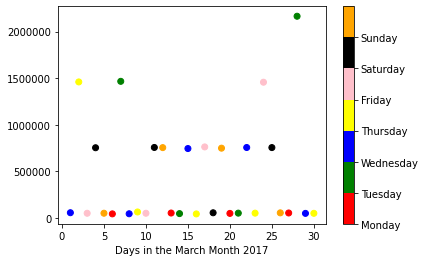

In [25]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
days_of_week=[0,1,2,3,4,5,6]
days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
colors = ["red","green","blue","yellow","pink","black","orange"]
plt.scatter(month_data,days_and_their_order_totals.values(),c=week_data,cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel("Days in the March Month 2017")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
cb = plt.colorbar()
loc = np.arange(0,max(days_of_week),max(days_of_week)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(days)
plt.show()

From the above plot, we can see that from all the outlets, the largest sales happened over Tuesday's from overall and we can see the pattern of sales whre during weekends, the sales are higher than that during the weekdays.

## SQL queries

1. How many orders were shipped by Speedy Express in total?

SELECT count(OrderID) from Orders O
join Shippers S on O.ShipperID=S.ShipperID
where S.ShipperName='Speedy Express';

#### Answer is 54

2. What is the last name of the employee with the most orders?

select e.lastname from (
SELECT  count(orderid) as orders,e.employeeid from Employees e inner join orders o on e.employeeid=o.employeeid group by e.employeeid order by orders desc ) es join employees e on es.employeeid=e.employeeid limit 1

#### Answer is : Peacock is the name of the employee with most orders and the count is 40.

3. What product was ordered the most by customers in Germany?

select ProductName from(
SELECT count(od.orderId) as product_counts,productid FROM [OrderDetails] od join Orders o 
on od.orderid=o.orderid
where customerid in (select customerid from customers where country='Germany')
group by od.productid order by product_counts desc)result join products p on result.productid=p.productid limit 1

#### Answer is :Gorgonzola Telino and the count is 5